In [1]:
import datetime as dt
import json
from jinja2 import Template
from pytz import timezone
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import HTML
from money_squirrel.bin import utils

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

COINS = utils.load_config("coins")

def display_all(df):
    return HTML(df.to_html())

2017-07-07 03:59:39,116|money_squirrel.bin.utils|INFO|Instantiated logger w/ name=money_squirrel.bin.utils
2017-07-07 03:59:39,119|money_squirrel.bin.utils|INFO|Loading JSON from /Users/ravdek/code/money_squirrel/money_squirrel/config/coins.json


In [16]:
df = utils.query_pg("""
    select *
    from trends_api_interestovertime
""")

2017-07-07 03:37:10,072|money_squirrel.bin.utils|INFO|Loading JSON from /Users/ravdek/code/money_squirrel/money_squirrel/config/postgres.json
2017-07-07 03:37:10,073|money_squirrel.bin.utils|INFO|Connecting to postgres DB @ localhost
2017-07-07 03:37:10,077|money_squirrel.bin.utils|INFO|Executing query:


    select *
    from trends_api_interestovertime




In [17]:
df.shape

(241332, 7)

In [18]:
df.tail()

,id,geo,dt,start_dt,end_dt,scores,search_terms
241327,241328,None,2017-06-08 18:00:00-07:00,2017-06-06 23:00:00-07:00,2017-06-13 23:00:00-07:00,"{u'litecoin scam': 0, u'litecoin up': 40, u'li...",None
241328,241329,None,2017-06-12 23:00:00-07:00,2017-06-06 23:00:00-07:00,2017-06-13 23:00:00-07:00,"{u'litecoin scam': 23, u'litecoin up': 31, u'l...",None
241329,241330,None,2017-06-13 23:00:00-07:00,2017-06-06 23:00:00-07:00,2017-06-13 23:00:00-07:00,"{u'litecoin scam': 8, u'litecoin up': 39, u'li...",None
241330,241331,None,2017-06-10 06:00:00-07:00,2017-06-06 23:00:00-07:00,2017-06-13 23:00:00-07:00,"{u'litecoin scam': 0, u'litecoin up': 13, u'li...",None
241331,241332,None,2017-06-10 00:00:00-07:00,2017-06-06 23:00:00-07:00,2017-06-13 23:00:00-07:00,"{u'litecoin scam': 9, u'litecoin up': 35, u'li...",None


In [7]:
df.dt.max()

datetime.datetime(2017, 6, 27, 17, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None))

In [8]:
df.dt.min()

datetime.datetime(2016, 12, 27, 16, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-480, name=None))

In [9]:
df.sort_values(['end_dt', 'dt']).head(20)

,id,geo,dt,start_dt,end_dt,scores
18370,18371,None,2016-12-27 16:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'litecoin': 1, u'ethereum': 3, u'bitcoin': 68}"
18541,18540,None,2016-12-27 16:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'bitcoin scam': 21, u'bitcoin crash': 3, u'b..."
18711,18709,None,2016-12-27 16:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'ethereum scam': 35, u'ethereum up': 17, u'e..."
18880,18878,None,2016-12-27 16:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'litecoin scam': 31, u'litecoin up': 0, u'li..."
18347,18348,None,2016-12-27 17:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'litecoin': 1, u'ethereum': 3, u'bitcoin': 63}"
18517,18517,None,2016-12-27 17:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'bitcoin scam': 46, u'bitcoin crash': 12, u'..."
18688,18686,None,2016-12-27 17:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'ethereum scam': 0, u'ethereum up': 54, u'et..."
18857,18855,None,2016-12-27 17:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'litecoin scam': 0, u'litecoin up': 0, u'lit..."
18334,18335,None,2016-12-27 18:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'litecoin': 1, u'ethereum': 3, u'bitcoin': 67}"
18504,18504,None,2016-12-27 18:00:00-08:00,2016-12-27 16:00:00-08:00,2017-01-03 16:00:00-08:00,"{u'bitcoin scam': 31, u'bitcoin crash': 9, u'b..."


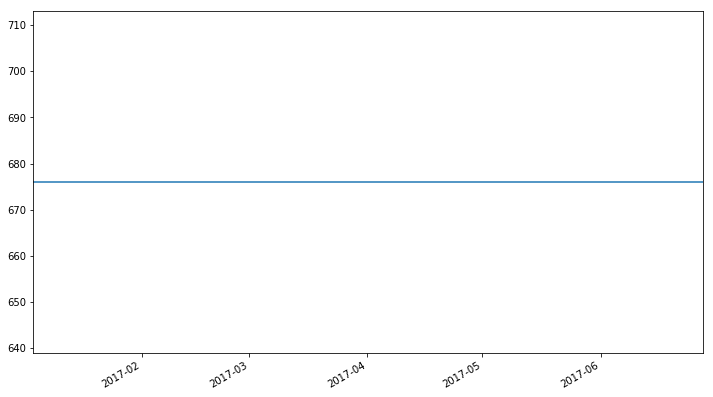

In [10]:
df.end_dt.value_counts().sort_index().plot()

In [11]:
one_end_time = df[df.end_dt.apply(lambda z: str(z)=='2017-01-03 16:00:00-08:00')]

In [12]:
one_end_time.shape

(676, 6)

In [15]:
df.loc[0, 'scores'].keys()

[u'litecoin', u'ethereum', u'bitcoin']

In [3]:
import money_squirrel.trends_api

In [4]:
dir(money_squirrel.trends_api)

['__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__']

In [5]:
import scipy